Александр Макаров 24.08.2025г.

# **Яндекс Афиша (итоговый проект)**

**Цель проекта**: провести анализ данных в Python, для выявления информации об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверка гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами

**Задачи проекта**:
1. Загрузка и ознакомление с данными
2. Предобработка данных и подготовка их к исследованию
3. Исследовательский анализ данных
    3.1 Анализ распределения заказов по сегментам и их сезонные изменения
    3.2 Активность пользователей осенью
    3.3 Популярные события и партнёры
4. Статистический анализ данных
5. Общий вывод и рекомендации

**Описание данных**:

**1. final_tickets_orders_df.csv:**

order_id — уникальный идентификатор заказа.

user_id — уникальный идентификатор пользователя.

created_dt_msk — дата создания заказа (московское время).

created_ts_msk — дата и время создания заказа (московское время).

event_id — идентификатор мероприятия из таблицы events.

cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.

age_limit — возрастное ограничение мероприятия.

currency_code — валюта оплаты, например rub для российских рублей.

device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.

revenue — выручка от заказа.

service_name — название билетного оператора.

tickets_count — количество купленных билетов.

total — общая сумма заказа.

**2. final_tickets_events_df.csv:**

event_id — уникальный идентификатор мероприятия.

event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.

event_type_description — описание типа мероприятия.

event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.

organizers — организаторы мероприятия.

region_name — название региона.

city_name — название города.

venue_id — уникальный идентификатор площадки.

venue_name — название площадки.

venue_address — адрес площадки.

**3. final_tickets_tenge_df.csv:**

nominal — номинал (100 тенге).

data — дата.

curs — курс тенге к рублю.

cdx — обозначение валюты (kzt).

In [1]:
#Загрузка необходимых библиотек:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

### Шаг 1. Загрузка и ознакомление с данными

In [2]:
df_orders=pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
df_events=pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
df_tenge=pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [3]:
df_orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
df_events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [5]:
df_tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [6]:
df_orders.info()
df_events.info()
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

**Результат ознакомления с данными**:
1. df_orders состоит из 290849 строк и 14 столбцов. В столбце "days_since_prev" присутствуют пропуски, они ознаячают, что у пользователя не было покупок до этого момента.
2. df_events состоит из 22427 строк и 11 столбцов. В датафрейме пропуски отсутствуют
3. df_tenge состоит из 357 строк и 4 столбца. В датафрейме пропуски отсутствую
4. Необходима проверка дубликатов, а также приведение стобцов с временнными данными в датафреймах :  df_orders и df_tenge кнеобходимому формату, так как на данный момент они хранятся в типе object.

### Шаг 2. Предобработка данных и подготовка их к исследованию

**Выполняем проверку на пропуски**

In [7]:
orders_null=df_orders.isnull().sum()
events_null=df_events.isnull().sum()
tenge_null=df_tenge.isnull().sum()
print(orders_null)
print(events_null)
print(tenge_null)

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64
event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64
data       0
nominal    0
curs       0
cdx        0
dtype: int64


Пропуски наблюдаются только в столбце "days_since_prev".

**Проверка категориальных переменных**

In [8]:
def analyze_categorical_data(df, df_name):
    print(f"\n=== Анализ категориальных переменных в {df_name} ===")
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    print(f"Категориальные колонки: {categorical_columns}")

    for col in categorical_columns:
        analyze_column(df, col)

def analyze_column(df, col):
    print(f"\n--- {col} ---")
    print(f"Тип данных: {df[col].dtype}")
    print(f"Уникальные значения: {df[col].unique()}")
    print(f"Количество уникальных значений: {df[col].nunique()}")

    # Подсчёт пропусков
    missing_count = df[col].isna().sum() + (df[col].astype(str).str.lower() == 'null').sum()
    print(f"Возможные обозначения пропусков: {missing_count}")

    null_count = df[col].isnull().sum()
    print(f"Пропуски (NaN/None): {null_count}")

    if df[col].nunique() < 20:
        print("Распределение:")
        print(df[col].value_counts())

    if df[col].dtype == 'object':
        whitespace_only = df[col].astype(str).str.strip().eq('').sum()
        print(f"Строки только из пробелов: {whitespace_only}")


In [9]:
analyze_categorical_data(df_orders, 'df_orders')
analyze_categorical_data(df_events, 'df_events')
analyze_categorical_data(df_tenge, 'df_tenge')


=== Анализ категориальных переменных в df_orders ===
Категориальные колонки: ['user_id', 'created_dt_msk', 'created_ts_msk', 'cinema_circuit', 'currency_code', 'device_type_canonical', 'service_name']

--- user_id ---
Тип данных: object
Уникальные значения: ['0002849b70a3ce2' '0005ca5e93f2cf4' '000898990054619' ...
 'fffcd3dde79eb2c' 'fffeeb3c120cf0b' 'ffff00725179321']
Количество уникальных значений: 21940
Возможные обозначения пропусков: 0
Пропуски (NaN/None): 0
Строки только из пробелов: 0

--- created_dt_msk ---
Тип данных: object
Уникальные значения: ['2024-08-20' '2024-07-23' '2024-10-06' '2024-07-13' '2024-10-04'
 '2024-10-23' '2024-08-15' '2024-09-29' '2024-10-15' '2024-06-20'
 '2024-06-21' '2024-06-25' '2024-07-25' '2024-06-17' '2024-07-04'
 '2024-09-16' '2024-07-02' '2024-08-31' '2024-09-25' '2024-10-25'
 '2024-09-07' '2024-07-08' '2024-07-31' '2024-10-02' '2024-10-16'
 '2024-07-10' '2024-07-21' '2024-07-28' '2024-08-02' '2024-08-28'
 '2024-09-21' '2024-10-09' '2024-10-14' '

**df_orders:**
1. user_id - количество уникальных значений 21940, пропуски и строки только из пробелов отсутствуют
2. created_dt_msk -количество уникальных значений 153, пропуски и строки только из пробелов отсутствуют
3. created_ts_msk -количество уникальных значений 280986, пропуски и строки только из пробелов отсутствуют
4. cinema_circuit -количество уникальных значений 6, пропуски и строки только из пробелов отсутствуют
5. currency_code -количество уникальных значений 2, пропуски и строки только из пробелов отсутствуют
6. device_type_canonical -количество уникальных значений 2, пропуски и строки только из пробелов отсутствуют
7. service_name -количество уникальных значений 36, пропуски и строки только из пробелов отсутствуют
**df_events:**
1. event_name -количество уникальных значений 15248, пропуски и строки только из пробелов отсутствуют
2. event_type_description -количество уникальных значений 20, пропуски и строки только из пробелов отсутствуют
3. event_type_main -количество уникальных значений 7, пропуски и строки только из пробелов отсутствуют
4. organizers -количество уникальных значений 4293, пропуски и строки только из пробелов отсутствуют
5. region_name -количество уникальных значений 81, пропуски и строки только из пробелов отсутствуют 
6. city_name -количество уникальных значений 352, пропуски и строки только из пробелов отсутствуют
7. venue_name -количество уникальных значений 3217, пропуски и строки только из пробелов отсутствуют
8. venue_address -количество уникальных значений 3225, пропуски и строки только из пробелов отсутствуют
**df_tenge:**
1. data -количество уникальных значений 357, пропуски и строки только из пробелов отсутствуют
2. cdx -количество уникальных значений 1, пропуски и строки только из пробелов отсутствуют

In [10]:
def normalize_categorical_data(df, df_name):
    print(f"\n=== Нормализация категориальных данных в {df_name} ===")

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    for col in categorical_columns:
        print(f"\nОбработка колонки {col}:")

        original_null_count = df[col].isnull().sum()


        df[col] = df[col].astype(str).str.lower().str.strip()


        missing_patterns = ['нет', 'null', 'nan', 'n/a', '', ' ', '-', '--', 'none', 'unknown']
        df[col] = df[col].replace(missing_patterns, np.nan)

        new_null_count = df[col].isnull().sum()
        changes = new_null_count - original_null_count

        print(f"  Добавлено NaN значений: {changes}")
        print(f"  Новые уникальные значения: {df[col].unique()}")


In [11]:
normalize_categorical_data(df_orders, 'df_orders')
normalize_categorical_data(df_events, 'df_events')
normalize_categorical_data(df_tenge, 'df_tenge')


=== Нормализация категориальных данных в df_orders ===

Обработка колонки user_id:
  Добавлено NaN значений: 0
  Новые уникальные значения: ['0002849b70a3ce2' '0005ca5e93f2cf4' '000898990054619' ...
 'fffcd3dde79eb2c' 'fffeeb3c120cf0b' 'ffff00725179321']

Обработка колонки created_dt_msk:
  Добавлено NaN значений: 0
  Новые уникальные значения: ['2024-08-20' '2024-07-23' '2024-10-06' '2024-07-13' '2024-10-04'
 '2024-10-23' '2024-08-15' '2024-09-29' '2024-10-15' '2024-06-20'
 '2024-06-21' '2024-06-25' '2024-07-25' '2024-06-17' '2024-07-04'
 '2024-09-16' '2024-07-02' '2024-08-31' '2024-09-25' '2024-10-25'
 '2024-09-07' '2024-07-08' '2024-07-31' '2024-10-02' '2024-10-16'
 '2024-07-10' '2024-07-21' '2024-07-28' '2024-08-02' '2024-08-28'
 '2024-09-21' '2024-10-09' '2024-10-14' '2024-10-27' '2024-10-31'
 '2024-06-19' '2024-09-17' '2024-09-03' '2024-06-02' '2024-07-07'
 '2024-08-09' '2024-10-24' '2024-10-22' '2024-07-19' '2024-08-08'
 '2024-07-11' '2024-06-27' '2024-09-02' '2024-10-26' '2024

В столбце "cinema_circuit" найдено 289451 значение "нет", которое при нормализации было заменено на "NaN". Больше значений которые могут означать пропуски, не найдено значений.


=== df_orders ===

order_id:
count    2.908490e+05
mean     4.326812e+06
std      2.497578e+06
min      1.000000e+00
25%      2.164039e+06
50%      4.327816e+06
75%      6.488606e+06
max      8.653108e+06
Name: order_id, dtype: float64


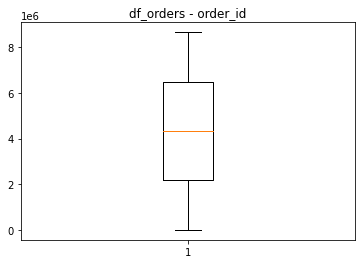


event_id:
count    290849.000000
mean     438079.127702
std      147396.389016
min        4436.000000
25%      361961.000000
50%      498329.000000
75%      546284.000000
max      592325.000000
Name: event_id, dtype: float64


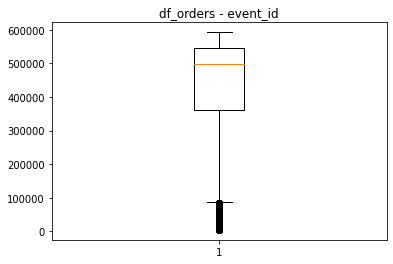


age_limit:
count    290849.000000
mean         10.211278
std           6.518124
min           0.000000
25%           6.000000
50%          12.000000
75%          16.000000
max          18.000000
Name: age_limit, dtype: float64


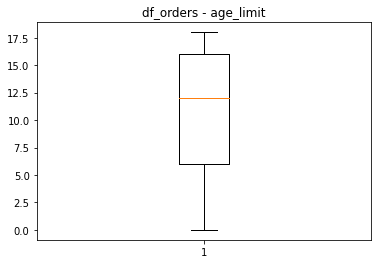


revenue:
count    290849.000000
mean        625.083054
std        1227.316214
min         -90.760000
25%         116.790000
50%         355.340000
75%         809.750000
max       81174.540000
Name: revenue, dtype: float64


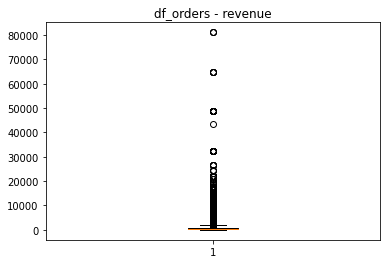


tickets_count:
count    290849.000000
mean          2.754230
std           1.170467
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


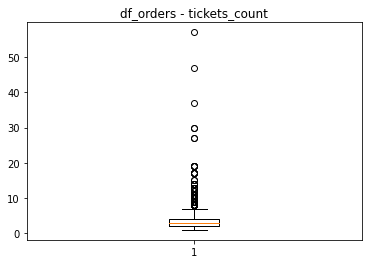


total:
count    290849.000000
mean       7526.465613
std       15328.267730
min        -358.850000
25%        2156.870000
50%        4771.390000
75%        8955.950000
max      811745.400000
Name: total, dtype: float64


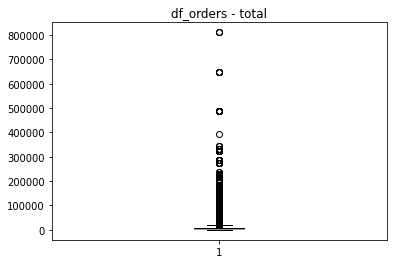


days_since_prev:
count    268909.000000
mean          3.222525
std          11.355158
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64


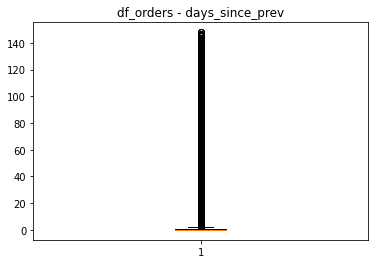


=== df_events ===

event_id:
count     22427.000000
mean     442092.938422
std      157426.949023
min        4436.000000
25%      360927.500000
50%      522824.000000
75%      553721.000000
max      592325.000000
Name: event_id, dtype: float64


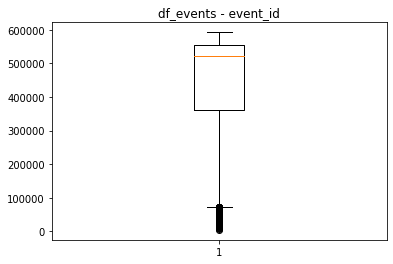


city_id:
count    22427.000000
mean      1156.666696
std       3891.504931
min          2.000000
25%         25.000000
50%         63.000000
75%        213.000000
max      37172.000000
Name: city_id, dtype: float64


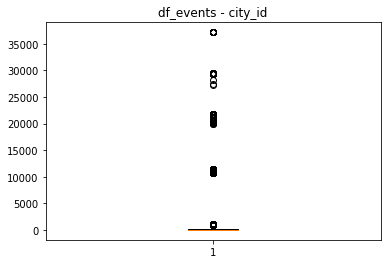


venue_id:
count    22427.000000
mean      2817.026887
std       1087.999845
min        894.000000
25%       1882.000000
50%       2849.000000
75%       3865.000000
max       4677.000000
Name: venue_id, dtype: float64


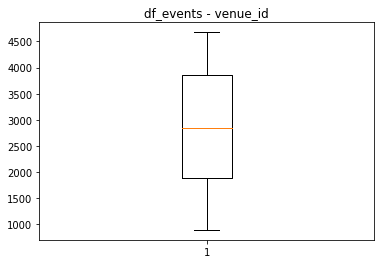


=== df_tenge ===

nominal:
count    357.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: nominal, dtype: float64


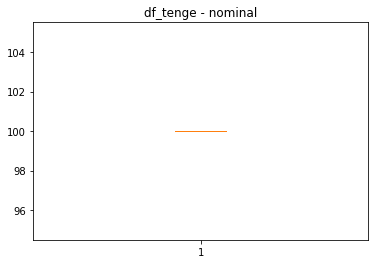


curs:
count    357.000000
mean      19.755818
std        0.833798
min       17.848600
25%       19.120200
50%       19.876000
75%       20.443300
max       21.937100
Name: curs, dtype: float64


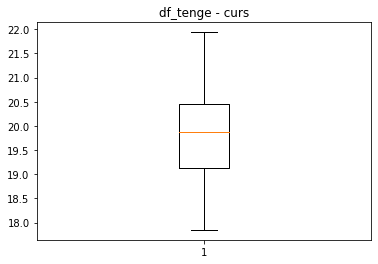

In [12]:
def simple_analyze_numeric(df, df_name):
    print(f"\n=== {df_name} ===")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        print(f"\n{col}:")
        print(df[col].describe())


        plt.figure(figsize=(6, 4))
        plt.boxplot(df[col].dropna())
        plt.title(f'{df_name} - {col}')
        plt.show()


simple_analyze_numeric(df_orders, 'df_orders')
simple_analyze_numeric(df_events, 'df_events')
simple_analyze_numeric(df_tenge, 'df_tenge')

In [13]:
df_rub = df_orders[df_orders['currency_code'] == 'rub'].copy()
df_kzt = df_orders[df_orders['currency_code'] == 'kzt'].copy()
df_tenge['data'] = pd.to_datetime(df_tenge['data'])
exchange_rates = df_tenge.set_index('data')['curs'].to_dict()

def convert_to_rub(row):
    order_date = pd.to_datetime(row['created_dt_msk']).date()
    closest_date = min(exchange_rates.keys(), key=lambda d: abs(d.date() - order_date))
    return row['revenue'] * exchange_rates[closest_date] / 100

if not df_kzt.empty:
    df_kzt['revenue_rub'] = df_kzt.apply(convert_to_rub, axis=1)

In [14]:
def analyze_currency(df, currency_name, revenue_col='revenue'):
    print(f"\n--- {currency_name} ---")
    print("Выручка:")
    print(df[revenue_col].describe())

    print("\nБилеты:")
    print(df['tickets_count'].describe())

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.boxplot(df[revenue_col].dropna())
    ax1.set_title(f'Выручка - {currency_name}')

    ax2.boxplot(df['tickets_count'].dropna())
    ax2.set_title(f'Билеты - {currency_name}')

    plt.show()

    return df[revenue_col].quantile(0.99)


--- Рубли ---
Выручка:
count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
25%         113.827500
50%         346.100000
75%         791.700000
max       81174.540000
Name: revenue, dtype: float64

Билеты:
count    285780.000000
mean          2.754077
std           1.171419
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


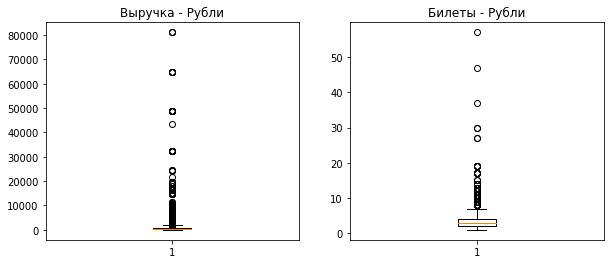


--- Тенге ---
Выручка:
count    5069.000000
mean      981.325159
std       975.240026
min         0.000000
25%        98.831720
50%       734.654217
75%      1419.633147
max      5256.843478
Name: revenue_rub, dtype: float64

Билеты:
count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: tickets_count, dtype: float64


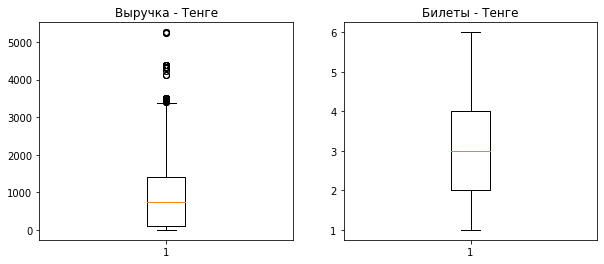

In [15]:
rub_99 = analyze_currency(df_rub, 'Рубли')
df_rub_clean = df_rub[df_rub['revenue'] <= rub_99]

if not df_kzt.empty:
    kzt_99 = analyze_currency(df_kzt, 'Тенге', 'revenue_rub')
    df_kzt_clean = df_kzt[df_kzt['revenue_rub'] <= kzt_99]

In [16]:
print(f"Рубли: удалено {len(df_rub) - len(df_rub_clean)} выбросов")
if not df_kzt.empty:
    print(f"Тенге: удалено {len(df_kzt) - len(df_kzt_clean)} выбросов")


Рубли: удалено 2858 выбросов
Тенге: удалено 29 выбросов


В столбцах выручки и количества билетов были обнаружены и удалены выбросы по 99% процентелю.

**Проверка на явные дубликаты**

In [17]:
print(f"\ndf_orders - полные дубликаты: {df_orders.duplicated().sum()}")
print(f"Дубликаты по order_id: {df_orders['order_id'].duplicated().sum()}")
print(f"\ndf_events - полные дубликаты: {df_events.duplicated().sum()}")
print(f"Дубликаты по event_id: {df_events['event_id'].duplicated().sum()}")
print(f"\ndf_tenge - полные дубликаты: {df_tenge.duplicated().sum()}")


df_orders - полные дубликаты: 0
Дубликаты по order_id: 0

df_events - полные дубликаты: 0
Дубликаты по event_id: 0

df_tenge - полные дубликаты: 0


**Проверка на неявные дубликаты**

In [18]:
booking_columns = [
    'user_id', 'created_dt_msk', 'event_id',
    'revenue', 'tickets_count', 'currency_code'
]

duplicate_mask = df_orders.duplicated(subset=booking_columns, keep=False)
duplicate_count = duplicate_mask.sum()

print(f"Неявных дубликатов бронирований: {duplicate_count}")
print(f"Что составляет {duplicate_count/len(df_orders)*100:.2f}% от всех заказов")

Неявных дубликатов бронирований: 86519
Что составляет 29.75% от всех заказов


In [19]:
all_columns = [col for col in df_orders.columns if col != 'order_id']

if duplicate_count > 0:
    duplicates = df_orders[duplicate_mask].sort_values(all_columns)

    print("\nПримеры дубликатов:")
    print(duplicates.head(10))

    duplicate_groups = duplicates.groupby(all_columns).size()

    summary_info = {
        "Количество групп дубликатов": len(duplicate_groups),
        "Максимальное количество повторов в группе": duplicate_groups.max()
    }

    print("\nСводка по дубликатам:")
    for key, value in summary_info.items():
        print(f"{key}: {value}")

    duplicates['created_ts_msk'] = pd.to_datetime(duplicates['created_ts_msk'])

time_diff_analysis = duplicates.groupby(all_columns)['created_ts_msk'].agg([
    'count', 'min', 'max', lambda x: (x.max() - x.min()).total_seconds() / 60
]).rename(columns={'<lambda_0>': 'time_diff_minutes'})

print("\nАнализ временных интервалов между дубликатами:")
print(time_diff_analysis.describe())

short_time_duplicates = time_diff_analysis[time_diff_analysis['time_diff_minutes'] < 5]

if len(short_time_duplicates) > 0:
    print(f"Найдено {len(short_time_duplicates)} групп дубликатов с интервалом < 5 минут")
    print("Рекомендуется оставить последнюю запись как наиболее актуальную")

    original_count = len(df_orders)

    df_orders_clean = df_orders.sort_values('created_ts_msk').drop_duplicates(
        subset=all_columns,
        keep='last'
    )

    removed_count = original_count - len(df_orders_clean)
    removal_percentage = (removed_count / original_count) * 100

    print(f"Удалено дубликатов: {removed_count}")
    print(f"Осталось записей: {len(df_orders_clean)}")
    print(f"Доля удаленных данных: {removal_percentage:.2f}%")

    if removal_percentage < 1:
        print("Удалена незначительная доля данных (<1%)")
    elif removal_percentage < 5:
        print("Удалена умеренная доля данных (1-5%) - рекомендуется проверить")
    else:
        print("Удалена значительная доля данных (>5%) - требуется тщательный анализ")

else:
    print("Дубликаты имеют значительные временные интервалы")
    print("Рекомендуется проверить бизнес-логику или оставить все записи")
    df_orders_clean = df_orders.copy()
    print(f"Доля удаленных данных: 0% (дубликаты не удалены)")


Примеры дубликатов:
    order_id          user_id created_dt_msk       created_ts_msk  event_id  \
9    6818017  000cf0659a9f40f     2024-06-20  2024-06-20 10:35:26    516728   
11   6818249  000cf0659a9f40f     2024-06-20  2024-06-20 10:49:48    516728   
14   6818191  000cf0659a9f40f     2024-06-20  2024-06-20 10:51:10    516728   
12   6818220  000cf0659a9f40f     2024-06-20  2024-06-20 10:56:16    516728   
15   6818046  000cf0659a9f40f     2024-06-20  2024-06-20 12:40:27    516728   
13   6818075  000cf0659a9f40f     2024-06-20  2024-06-20 12:42:12    516728   
16   6818104  000cf0659a9f40f     2024-06-20  2024-06-20 12:46:11    516728   
20   6818162  000cf0659a9f40f     2024-06-21  2024-06-21 04:18:44    516728   
17   6817959  000cf0659a9f40f     2024-06-21  2024-06-21 04:33:56    516728   
21   6817988  000cf0659a9f40f     2024-06-21  2024-06-21 04:34:58    516728   

   cinema_circuit  age_limit currency_code device_type_canonical  revenue  \
9             NaN         12    

В поле user_id в бронировании билетов были найдены неявные дубликаты. Интервал между этими операциями составил менее 5 минут, значит имеет место быть техническая ошибка. Рекомендуется оставить последнюю запись как наиболее актуальную, остальные записи удалить.

**Преобразование типов данных**

In [20]:
#Приводим тип данных в дату в нужных столбцах
df_orders_clean['created_dt_msk']=pd.to_datetime(df_orders_clean['created_dt_msk'])
df_orders_clean['created_ts_msk']=pd.to_datetime(df_orders_clean['created_ts_msk'])

df_tenge['data']=pd.to_datetime(df_tenge['data'])

In [21]:
#Пониджаем размерность для оптимизации
def optimize_numeric_types(df, df_name):

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        old_dtype = df[col].dtype
        col_min = df[col].min()
        col_max = df[col].max()

        # Выбор оптимального типа
        if col_min >= 0:
            if col_max < 255:
                new_dtype = 'uint8'
            elif col_max < 65535:
                new_dtype = 'uint16'
            elif col_max < 4294967295:
                new_dtype = 'uint32'
            else:
                new_dtype = 'uint64'
        else:
            if col_min > -128 and col_max < 127:
                new_dtype = 'int8'
            elif col_min > -32768 and col_max < 32767:
                new_dtype = 'int16'
            elif col_min > -2147483648 and col_max < 2147483647:
                new_dtype = 'int32'
            else:
                new_dtype = 'int64'
optimize_numeric_types(df_orders_clean, 'df_orders_clean')
optimize_numeric_types(df_events, 'df_events')
optimize_numeric_types(df_tenge, 'df_tenge')

In [22]:
print(df_orders_clean.dtypes)

order_id                          int64
user_id                          object
created_dt_msk           datetime64[ns]
created_ts_msk           datetime64[ns]
event_id                          int64
cinema_circuit                   object
age_limit                         int64
currency_code                    object
device_type_canonical            object
revenue                         float64
service_name                     object
tickets_count                     int64
total                           float64
days_since_prev                 float64
dtype: object


In [23]:
print(df_events.dtypes)

event_id                   int64
event_name                object
event_type_description    object
event_type_main           object
organizers                object
region_name               object
city_name                 object
city_id                    int64
venue_id                   int64
venue_name                object
venue_address             object
dtype: object


In [24]:
print(df_tenge.dtypes)

data       datetime64[ns]
nominal             int64
curs              float64
cdx                object
dtype: object


**Добавление новых столбцов и объединение датафреймов**

In [25]:
df_all = df_orders_clean.merge(df_events, on='event_id', how='left')
print(f"Размер объединенного датафрейма: {df_all.shape}")

Размер объединенного датафрейма: (290819, 24)


In [26]:
df_tenge['data'] = pd.to_datetime(df_tenge['data'])
exchange_rates = df_tenge.set_index('data')['curs'].to_dict()

def convert_to_rub(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    elif row['currency_code'] == 'kzt':
        order_date = pd.to_datetime(row['created_dt_msk']).date()
        closest_date = min(exchange_rates.keys(), key=lambda d: abs(d.date() - order_date))
        return row['revenue'] * exchange_rates[closest_date] / 100
    else:
        return np.nan
df_all['revenue_rub'] = df_all.apply(convert_to_rub, axis=1)

In [27]:
df_all['one_ticket_revenue_rub'] = df_all['revenue_rub'] / df_all['tickets_count']

In [28]:
df_all['created_ts_msk'] = pd.to_datetime(df_all['created_ts_msk'])
df_all['month'] = df_all['created_ts_msk'].dt.month.astype('int8')

In [29]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

df_all['season'] = df_all['month'].apply(get_season).astype('category')

In [30]:
df_all.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
0,7565637,fd4d47438ebb946,2024-06-01,2024-06-01 00:00:42,131671,NaN,12,rub,mobile,1083.15,...,каменевский регион,глиногорск,213.0,4019.0,"группа исследователей искусства ""сказка"" лтд","алл. шаумяна, д. 48 стр. 584",1083.15,270.787500,6,лето
1,7565521,fd4d47438ebb946,2024-06-01,2024-06-01 00:01:30,131671,NaN,12,rub,mobile,812.36,...,каменевский регион,глиногорск,213.0,4019.0,"группа исследователей искусства ""сказка"" лтд","алл. шаумяна, д. 48 стр. 584",812.36,270.786667,6,лето
2,6670842,57ef0a1905ac488,2024-06-01,2024-06-01 00:01:58,375861,NaN,12,rub,mobile,2091.31,...,лесодальний край,родниковец,55.0,2095.0,"молодежная творческая группа ""студия"" лимитед","наб. волжская, д. 1 к. 3/9",2091.31,522.827500,6,лето
3,7565550,fd4d47438ebb946,2024-06-01,2024-06-01 00:03:13,131671,NaN,12,rub,mobile,812.36,...,каменевский регион,глиногорск,213.0,4019.0,"группа исследователей искусства ""сказка"" лтд","алл. шаумяна, д. 48 стр. 584",812.36,270.786667,6,лето
4,5502055,e73089d7d016cd8,2024-06-01,2024-06-01 00:03:34,211846,NaN,12,rub,mobile,181.39,...,широковская область,радужнополье,35.0,3149.0,"дворец культуры ""скворечник"" инк","пер. кочубея, д. 7/7 к. 50",181.39,90.695000,6,лето


In [31]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290819 entries, 0 to 290818
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290819 non-null  int64         
 1   user_id                 290819 non-null  object        
 2   created_dt_msk          290819 non-null  datetime64[ns]
 3   created_ts_msk          290819 non-null  datetime64[ns]
 4   event_id                290819 non-null  int64         
 5   cinema_circuit          1398 non-null    object        
 6   age_limit               290819 non-null  int64         
 7   currency_code           290819 non-null  object        
 8   device_type_canonical   290819 non-null  object        
 9   revenue                 290819 non-null  float64       
 10  service_name            290819 non-null  object        
 11  tickets_count           290819 non-null  int64         
 12  total                   290819

Было добавлено 4 новых столбца:
- revenue_rub - выручка в рублях
- one_ticket_revenue_rub - выручка в рублях с одного билета
- month - номер месяца
- season - информацией о сезонности

**Промежуточные выводы**:
1. Пропуски присутствовали исключительно в столбце days_since_prev.
2. При проверки категориальных переменных на обозначение пропусков нашли заглушку "нет" в столбце cinema_circuit (289451 шт), ее заменили на NaN
3. Провекрка количественных переменных показала большие выбросы в столбцах revenue и tickets_count. Такие выбросы были заменены 99% процетилем.
4. Явные дубликаты не обнаружены.
5. Проверка неявных дубликатов показала наличие таких в поле user_id в бронировании билетов. Интервал между операциями составил менее 5 минут, а значит имеет место быть техническая ошибка. Рекомендуется оставить последнюю запись как наиболее актуальную, а остальные удалить. Таким образом, было удалено 30 дубликатов, которые составили 0.01% от всего объема данных. После удаления осталось 290819 записей.
6. Были объеденены датафреймы df_orders и df_events в один датафрейм df_all, чтобы впоследствие добавить новые столбцы
7. Добавлено 4 столбца: month, one_ticket_revenue_rub, revenue_rub  и season

### Шаг 3. Исследовательский анализ данных

#### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

**Количество заказов по месяцам и динамика изменения**

In [32]:
monthly_orders = df_all.groupby('month')['order_id'].count().reset_index()
monthly_orders.columns = ['month', 'order_count']
monthly_orders = monthly_orders.sort_values('month')
monthly_orders['prev_month_orders'] = monthly_orders['order_count'].shift(1)
monthly_orders['monthly_change_percent'] = ((monthly_orders['order_count'] - monthly_orders['prev_month_orders']) /
                                           monthly_orders['prev_month_orders']) * 100

print("Динамика заказов по месяцам с процентным изменением:")
print(monthly_orders[['month', 'order_count', 'monthly_change_percent']])

Динамика заказов по месяцам с процентным изменением:
   month  order_count  monthly_change_percent
0      6        34676                     NaN
1      7        40924               18.018226
2      8        45037               10.050337
3      9        69973               55.367809
4     10       100209               43.210953


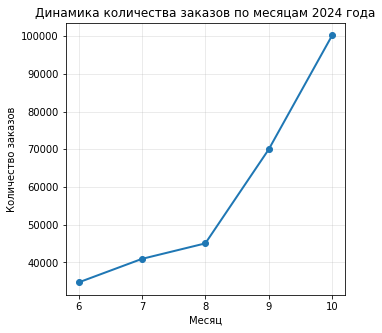

In [33]:
plt.figure(figsize=(5, 5))
plt.plot(monthly_orders['month'], monthly_orders['order_count'], marker='o', linewidth=2)
plt.title('Динамика количества заказов по месяцам 2024 года')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(6, 11))
plt.grid(True, alpha=0.3)
plt.show()


In [34]:
june_orders = monthly_orders[monthly_orders['month'] == 6]['order_count'].values[0]
october_orders = monthly_orders[monthly_orders['month'] == 10]['order_count'].values[0]
growth = (october_orders - june_orders) / june_orders * 100

print(f"Заказов в июне: {june_orders}")
print(f"Заказов в октябре: {october_orders}")
print(f"Рост: {growth:.1f}%")

Заказов в июне: 34676
Заказов в октябре: 100209
Рост: 189.0%


Видно, что количество заказов увеличивается с июня по ноябрь. В июне было зафиксировано 34683 заказа, а в октябре 100221 количество заказов увеличилось на 189%.

**Распределение заказов по категориям летом и осенью**

In [35]:
summer_data = df_all[df_all['season'] == 'лето']
autumn_data = df_all[df_all['season'] == 'осень']

In [36]:
def season_comparison(data_summer, data_autumn, column_name, title):
    summer_dist = data_summer[column_name].value_counts(normalize=True).reset_index()
    summer_dist.columns = [column_name, 'summer_share']

    autumn_dist = data_autumn[column_name].value_counts(normalize=True).reset_index()
    autumn_dist.columns = [column_name, 'autumn_share']

    merged_dist = summer_dist.merge(autumn_dist, on=column_name, how='outer').fillna(0)
    merged_dist = merged_dist.sort_values('autumn_share', ascending=False)

    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(merged_dist))
    width = 0.35

    ax.bar(x - width/2, merged_dist['summer_share'], width, label='Лето', alpha=0.8)
    ax.bar(x + width/2, merged_dist['autumn_share'], width, label='Осень', alpha=0.8)

    ax.set_xlabel(column_name)
    ax.set_ylabel('Доля заказов')
    ax.set_title(f'Распределение заказов по {title}: лето vs осень')
    ax.set_xticks(x)
    ax.set_xticklabels(merged_dist[column_name], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return merged_dist


 Распределение по типам мероприятий:


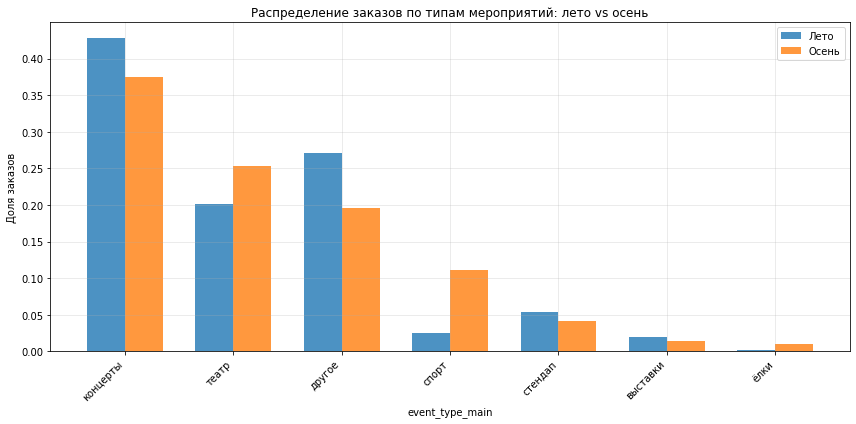

In [37]:
print("\n Распределение по типам мероприятий:")
event_type = season_comparison(summer_data, autumn_data, 'event_type_main', 'типам мероприятий')


 Распределение по типам устройств:


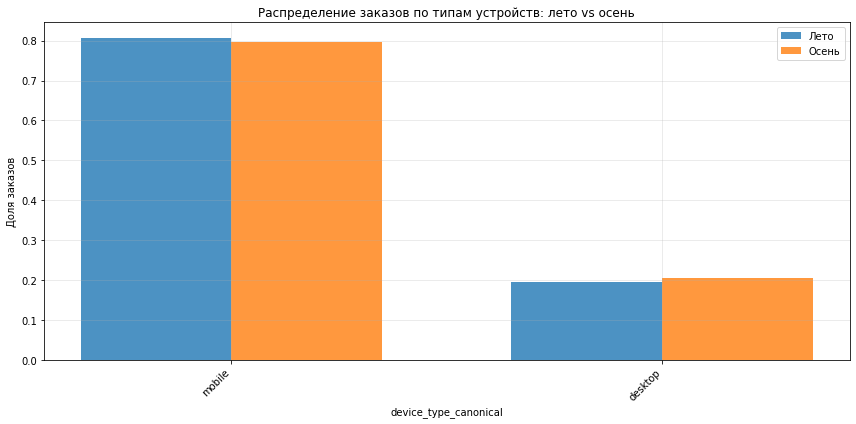

In [38]:
print("\n Распределение по типам устройств:")
device = season_comparison(summer_data, autumn_data, 'device_type_canonical', 'типам устройств')


 Распределение по возрастным рейтингам:


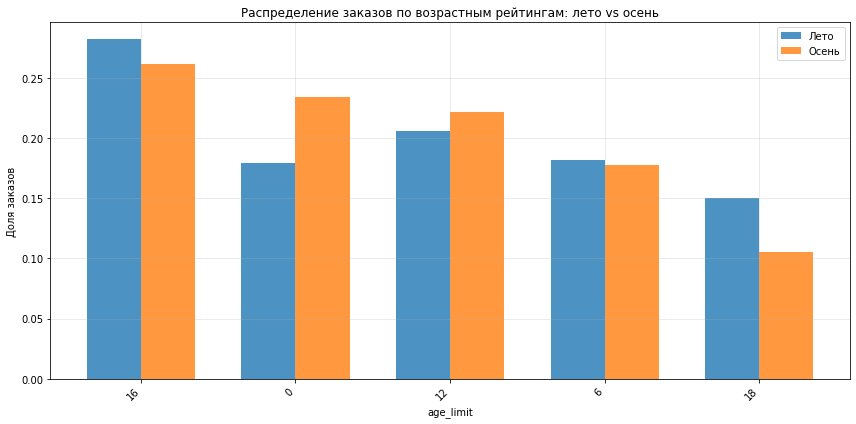

In [39]:
print("\n Распределение по возрастным рейтингам:")
age_rating = season_comparison(summer_data, autumn_data, 'age_limit', 'возрастным рейтингам')

1. Мероприятия: Летом количество заказв на концерты, другое, стендап и выставки больше чем осенью. Это может быть связано с тем что летом проводится большое количество тмаких мероприятий на открытых площадках. Осенью большее количество заказаов приходится на театры, спорт и елки. Это скорее всего связано с погодными условиями, т.к. театры и елки проходят в помещениях. Рост покупки билетов на спорт может быть связан с тем что во второй половине лета в России стартует футбольный сезон, матчи которого собирают большое количество посетителей.
2. Устройств: что летом что осенью лтдируют мобильные устройства. Осенью немного уменьщилась доля мобильных устройств и чуть чуть прибавилась доля стационарных. Данные изменения могут быть связаны с тем, что летом люди больше времени проводят на улице, дачах и т.д., а мобильные устройства всегда под рукой.
3. Возрастной рейтинг: летом наиболее популярны рейтинги 16+ и 18+, а осенью 0+ и 12+. Такое распределение можно объяснить тем, что осенью чаще проводятся мероприятия для детей, так как летом дети часто в разъездах (на море, в деревне и тд), а летом большее количество мероприятий преднозначенно именно для взрослых. Рейтин 6+ практически не меняется с изменением сезона.

**Изменение выручки с продажи одного билета летом и осенью**

In [40]:
ticket_price_change = df_all.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].mean().reset_index()
ticket_price_change

,event_type_main,season,one_ticket_revenue_rub
0,выставки,лето,86.416198
1,выставки,осень,91.066619
2,другое,лето,81.088709
3,другое,осень,77.097947
4,концерты,лето,319.079485
5,концерты,осень,286.763211
6,спорт,лето,54.112065
7,спорт,осень,52.139437
8,стендап,лето,227.070677
9,стендап,осень,249.963862


In [41]:
summer_prices = ticket_price_change[ticket_price_change['season'] == 'лето'][['event_type_main', 'one_ticket_revenue_rub']]
autumn_prices = ticket_price_change[ticket_price_change['season'] == 'осень'][['event_type_main', 'one_ticket_revenue_rub']]

In [42]:
price_comparison = summer_prices.merge(autumn_prices, on='event_type_main', suffixes=('_summer', '_autumn'))
price_comparison['price_change'] = ((price_comparison['one_ticket_revenue_rub_autumn'] -
                                   price_comparison['one_ticket_revenue_rub_summer']) /
                                  price_comparison['one_ticket_revenue_rub_summer'] * 100)
price_comparison = price_comparison.sort_values('price_change', ascending=False)
price_comparison

,event_type_main,one_ticket_revenue_rub_summer,one_ticket_revenue_rub_autumn,price_change
4,стендап,227.070677,249.963862,10.081964
0,выставки,86.416198,91.066619,5.381423
3,спорт,54.112065,52.139437,-3.645448
1,другое,81.088709,77.097947,-4.921477
2,концерты,319.079485,286.763211,-10.127970
6,ёлки,276.388228,234.503838,-15.154187
5,театр,222.524554,183.053370,-17.737900


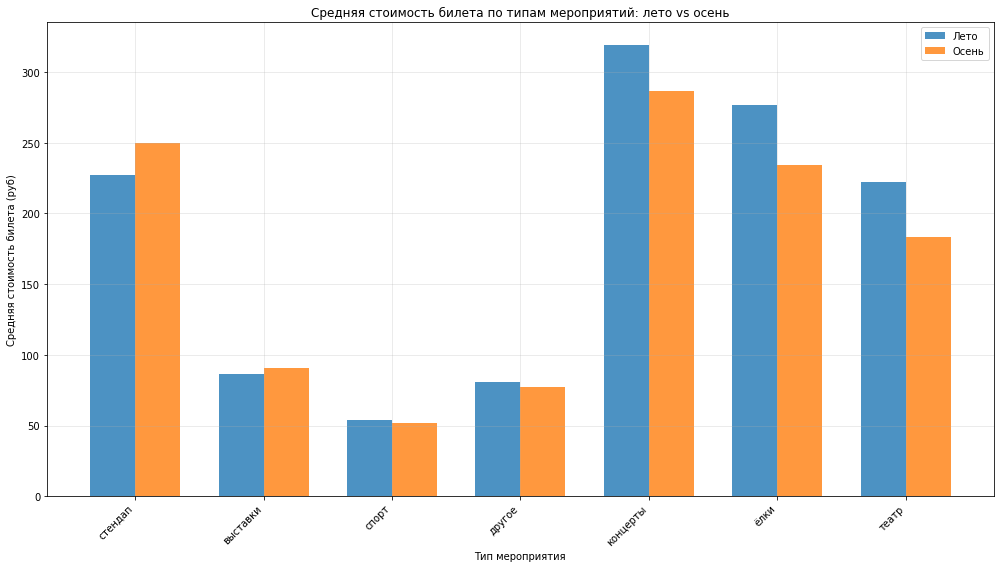

In [43]:
plt.figure(figsize=(14, 8))
x = np.arange(len(price_comparison))
width = 0.35

plt.bar(x - width/2, price_comparison['one_ticket_revenue_rub_summer'], width,
        label='Лето', alpha=0.8)
plt.bar(x + width/2, price_comparison['one_ticket_revenue_rub_autumn'], width,
        label='Осень', alpha=0.8)

plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя стоимость билета (руб)')
plt.title('Средняя стоимость билета по типам мероприятий: лето vs осень')
plt.xticks(x, price_comparison['event_type_main'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
ticket_price_by_season = df_all.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].agg([
    'mean', 'count', 'std'
]).reset_index()

ticket_price_by_season.columns = ['event_type_main', 'season', 'mean_price', 'order_count', 'std_price']

print("Средняя выручка с одного билета по типам мероприятий и сезонам:")
print(ticket_price_by_season)

Средняя выручка с одного билета по типам мероприятий и сезонам:
   event_type_main season  mean_price  order_count   std_price
0         выставки   лето   86.416198         2416   69.066084
1         выставки  осень   91.066619         2437   81.101139
2           другое   лето   81.088709        32568  111.061502
3           другое  осень   77.097947        33287   99.532550
4         концерты   лето  319.079485        51538  381.865368
5         концерты  осень  286.763211        63734  441.850243
6            спорт   лето   54.112065         3013  103.038038
7            спорт  осень   52.139437        18893  103.958067
8          стендап   лето  227.070677         6401  210.213282
9          стендап  осень  249.963862         6992  261.794737
10           театр   лето  222.524554        24209  181.218048
11           театр  осень  183.053370        43104  175.564352
12            ёлки   лето  276.388228          276  152.882123
13            ёлки  осень  234.503838         1713  16

In [45]:
summer_prices = ticket_price_by_season[ticket_price_by_season['season'] == 'лето'][['event_type_main', 'mean_price', 'order_count']]
autumn_prices = ticket_price_by_season[ticket_price_by_season['season'] == 'осень'][['event_type_main', 'mean_price', 'order_count']]
summer_prices.columns = ['event_type_main', 'mean_price_summer', 'order_count_summer']
autumn_prices.columns = ['event_type_main', 'mean_price_autumn', 'order_count_autumn']

price_comparison = summer_prices.merge(autumn_prices, on='event_type_main', how='outer').fillna(0)

In [46]:
price_comparison['price_change_percent'] = np.where(
    price_comparison['mean_price_summer'] > 0,
    ((price_comparison['mean_price_autumn'] - price_comparison['mean_price_summer']) /
     price_comparison['mean_price_summer']) * 100,
    0
)
price_comparison['price_change_percent']

0     5.381423
1    -4.921477
2   -10.127970
3    -3.645448
4    10.081964
5   -17.737900
6   -15.154187
Name: price_change_percent, dtype: float64

In [47]:
price_comparison['price_change_abs'] = price_comparison['mean_price_autumn'] - price_comparison['mean_price_summer']
price_comparison['price_change_abs']

0     4.650421
1    -3.990762
2   -32.316274
3    -1.972627
4    22.893185
5   -39.471184
6   -41.884390
Name: price_change_abs, dtype: float64

In [48]:
price_comparison['total_orders'] = price_comparison['order_count_summer'] + price_comparison['order_count_autumn']
price_comparison['total_orders']

0      4853
1     65855
2    115272
3     21906
4     13393
5     67313
6      1989
Name: total_orders, dtype: int64

In [49]:
price_comparison = price_comparison.sort_values('price_change_abs', ascending=False)
print("\nОтносительное изменение средней стоимости билета (осень vs лето):")
print(price_comparison[['event_type_main', 'mean_price_summer', 'mean_price_autumn',
                       'price_change_abs', 'price_change_percent', 'total_orders']])


Относительное изменение средней стоимости билета (осень vs лето):
  event_type_main  mean_price_summer  mean_price_autumn  price_change_abs  \
4         стендап         227.070677         249.963862         22.893185   
0        выставки          86.416198          91.066619          4.650421   
3           спорт          54.112065          52.139437         -1.972627   
1          другое          81.088709          77.097947         -3.990762   
2        концерты         319.079485         286.763211        -32.316274   
5           театр         222.524554         183.053370        -39.471184   
6            ёлки         276.388228         234.503838        -41.884390   

   price_change_percent  total_orders  
4             10.081964         13393  
0              5.381423          4853  
3             -3.645448         21906  
1             -4.921477         65855  
2            -10.127970        115272  
5            -17.737900         67313  
6            -15.154187          198

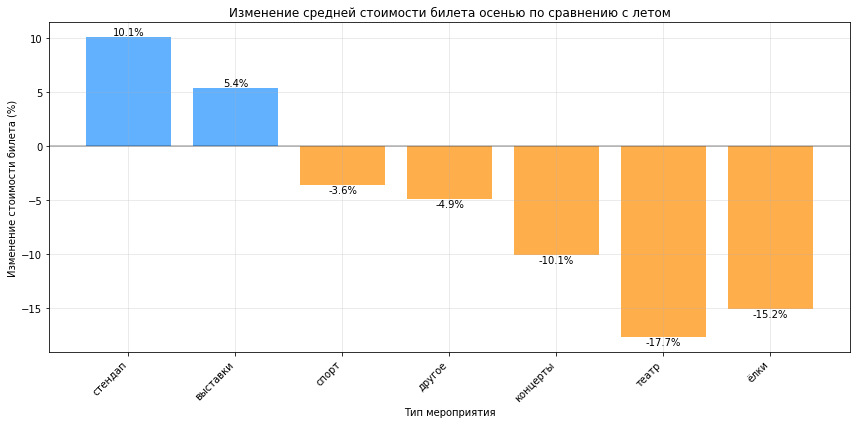

In [50]:
plt.figure(figsize=(12, 6))
colors = [ 'DodgerBlue' if x > 0 else 'DarkOrange' for x in price_comparison['price_change_percent']]
bars = plt.bar(price_comparison['event_type_main'], price_comparison['price_change_percent'], color=colors, alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=10)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Тип мероприятия')
plt.ylabel('Изменение стоимости билета (%)')
plt.title('Изменение средней стоимости билета осенью по сравнению с летом')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1. Летом стоимость одного билета на спорт, елки, концерты, театр и другое выше, чем осенью. Эт может быть связано с несвойственностью мероприятия для лета (например, елки), большим количеством желающих (концерты).  Самое сильное изменение цен зафиксировано в театре: цена осенью снижается на 17%, скорее всего это связано с театральными сезонами (сентябрь-май), летом многие театры уходят "на каникулы", соответственно поднимаются цены на те театры которые продолэают работать, осенью же количество работающих театров больше, соответсвенно приходится снижать цены из-за конкуренции.
2. Самая высокая средняя цена одного билета летом зафиксирована в концертах и составила 319 рублей, при этом самая низкая летняя средняя цена относится к спорту и составляет всего 54 рубля. Осенью самая высокая средняя цена также принадлежит концертам и составляет 286.7 руб., а самая низкая средняя стоиомсть билета также принадлежит спорту и составляет 59 руб. Самое сильное абсолютное изменение зафикисровано у елок (-41 руб.), а самое сильное относительное изменение замечено у театра и составило -17.7%.

**Промежуточный выводы**:
1. Зафиксирован рост заказов с июня по ноябрь (189%). Наибольший рост заказов был с августа по сентябрь (+55%).
2. Количество заказанных билетов меняется от времени года:
    - Концерты, стендапы, другое и выставки более популярны летом, остальные популярнее осенью.
    - И летом, и осенью наиболее часто заказы совершаются через мобильные устройства.
    - Летом более популярны такие возрастные рейтинги, как 16+ 18+, а осенью 0+ и 12+.
3. Летом стоимость одного билета на спорт, елки, концерты, театр и другое выше, чем осенью. При этом средняя стоимость одного билета на стендап и выставки осенью растет, а на остальные типы мероприятий снижается. Так самое сильное снижение замечено у театра (средняя стоимость билета снизилась на 17.7%)

#### 3.2. Осенняя активность пользователей

**Динамика изменения по дням**

In [51]:
autumn_2024 = df_all[df_all['season'] == 'осень'].copy()
autumn_2024['created_dt_msk'] = pd.to_datetime(autumn_2024['created_dt_msk'])
print(f"Данные за осень: {len(autumn_2024)} заказов")

Данные за осень: 170182 заказов


In [52]:
daily_activity = autumn_2024.groupby('created_dt_msk').agg({
    'order_id': 'count',
    'user_id': 'nunique',
    'one_ticket_revenue_rub': 'mean'
}).reset_index()

daily_activity.columns = ['date', 'total_orders', 'dau', 'avg_ticket_price']
daily_activity['orders_per_user'] = daily_activity['total_orders'] / daily_activity['dau']

daily_activity.head()

,date,total_orders,dau,avg_ticket_price,orders_per_user
0,2024-09-01,1348,569,208.117515,2.369069
1,2024-09-02,1391,580,195.536090,2.398276
2,2024-09-03,5124,783,82.095430,6.544061
3,2024-09-04,1785,688,184.003352,2.594477
4,2024-09-05,1960,745,194.513164,2.630872


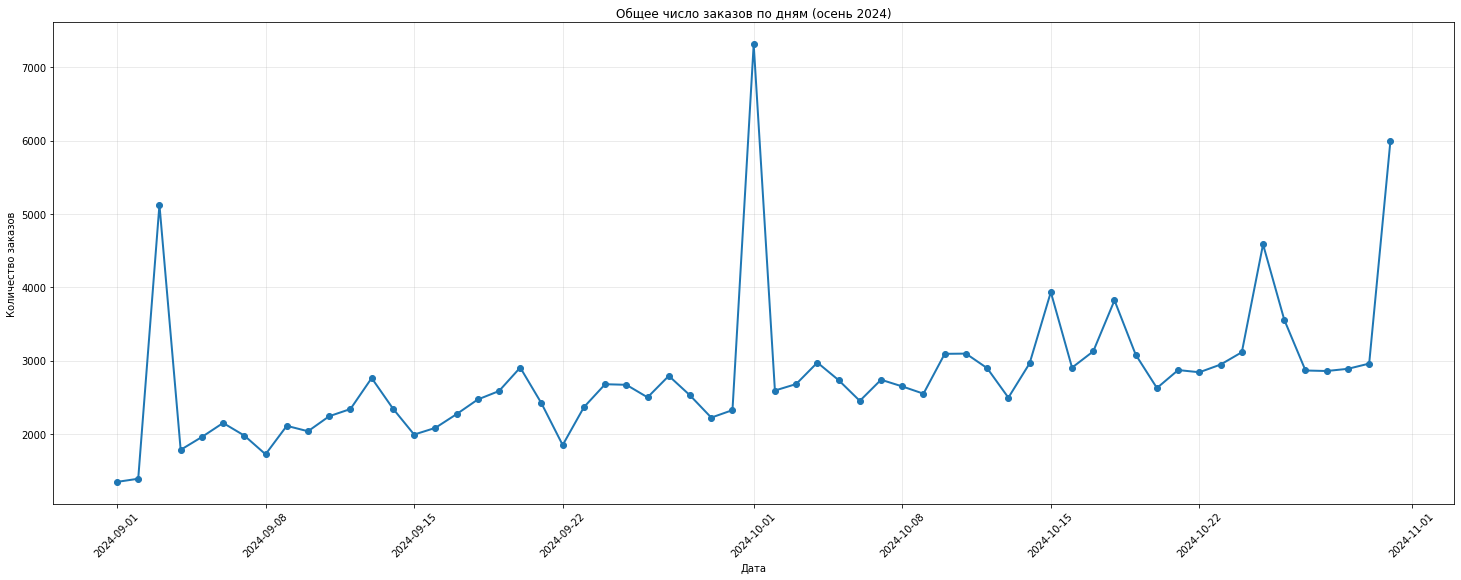

In [53]:
plt.figure(figsize=(40, 15))
plt.subplot(2, 2, 1)
plt.plot(daily_activity['date'], daily_activity['total_orders'], marker='o', linewidth=2)
plt.title('Общее число заказов по дням (осень 2024)')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

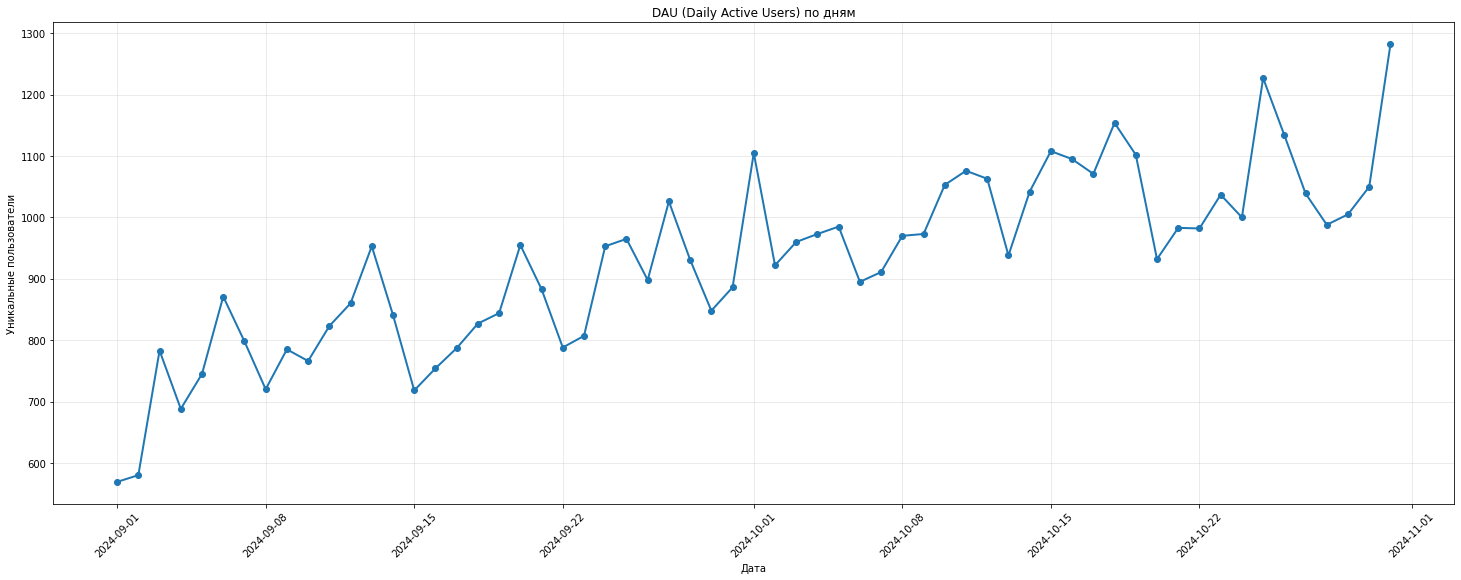

In [54]:
plt.figure(figsize=(40, 15))
plt.subplot(2, 2, 2)
plt.plot(daily_activity['date'], daily_activity['dau'], marker='o', linewidth=2)
plt.title('DAU (Daily Active Users) по дням')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

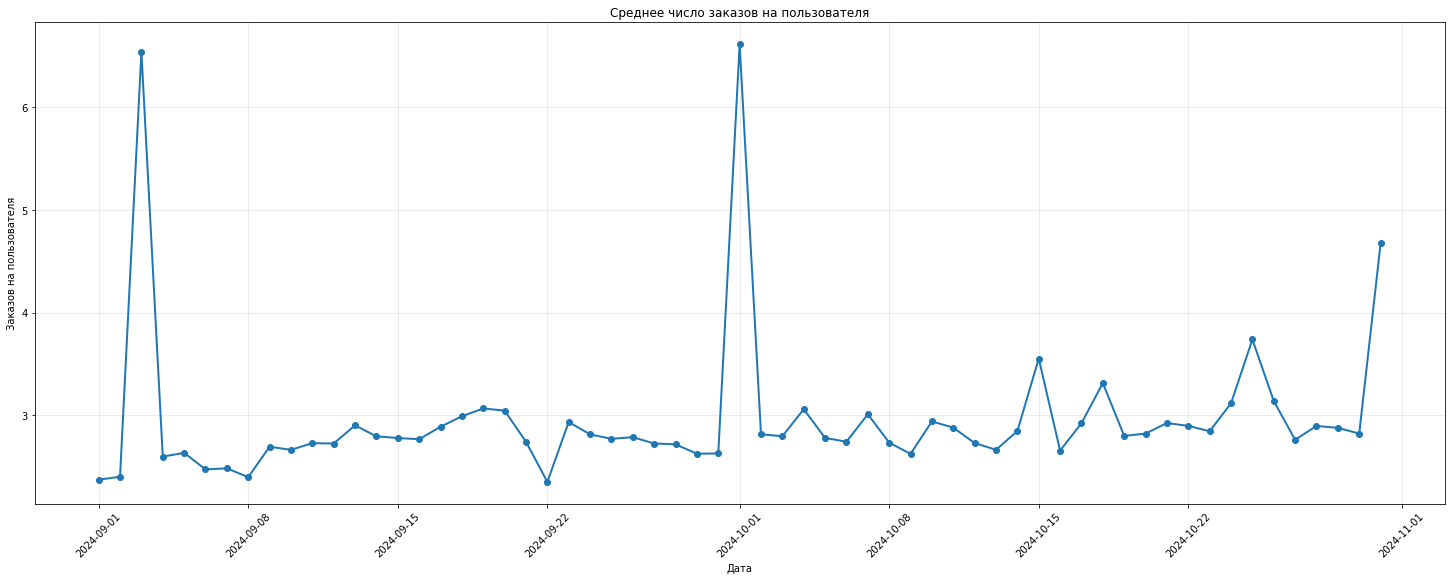

In [55]:
plt.figure(figsize=(40, 15))
plt.subplot(2, 2, 3)
plt.plot(daily_activity['date'], daily_activity['orders_per_user'], marker='o', linewidth=2)
plt.title('Среднее число заказов на пользователя')
plt.xlabel('Дата')
plt.ylabel('Заказов на пользователя')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

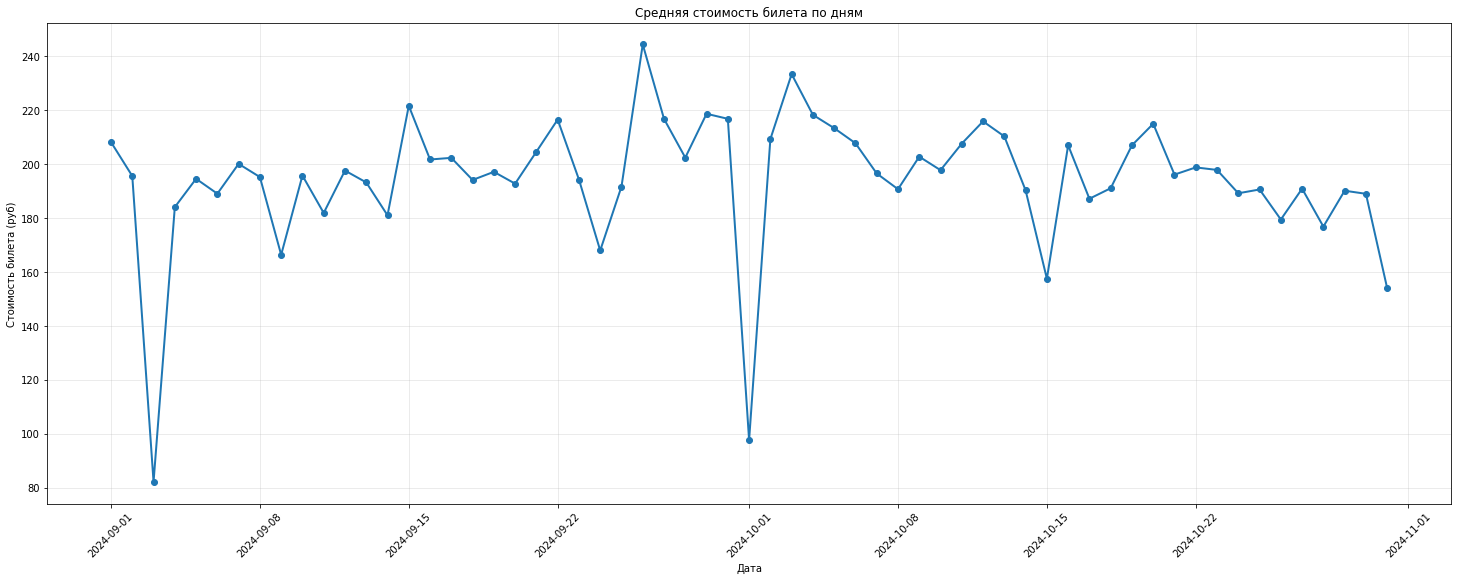

In [56]:
plt.figure(figsize=(40, 15))
plt.subplot(2, 2, 4)
plt.plot(daily_activity['date'], daily_activity['avg_ticket_price'], marker='o', linewidth=2)
plt.title('Средняя стоимость билета по дням')
plt.xlabel('Дата')
plt.ylabel('Стоимость билета (руб)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Вывод**:
1. За сентябрь-октябрь 2024г было сделано 170197 заказов.
2. График количества заказов по дням не взирая на его пиковость имеет общую тенденцию к увеличению числа заказов (с менее 1000 в начале сентября до 3000 в конце октября . Максимальное количество заказов (более 7000) было совершено первого октября.
3. График DAU также имеет плавный рост . А максимальная дневная активность пользователей зафиксирована 31.10.2024г. и составила почти 1300.
3. Среднее число заказов на пользователя в день  имеет пики 3.09.2024г., 01.10.2024г., 15.10.2024г., 18.10.2024г., 25.10.2024г. и 31.10.2024г.. Максимальное число заказов на пользователя в день было зафиксировано 01.10.2024г. и составило более 6 заказов.
4. Средняя стоимость билета явно влияет на общее число заказов и среднее число заказов на пользователя. График средней стоимость билета  является пиковым, но зафиксированные пики отрицательны и совпадают с увеличением общего числа заказов и числа заказов на одного пользователя.

**Недельная цикличность**

In [57]:
daily_activity['day_of_week'] = daily_activity['date'].dt.day_name()
daily_activity['is_weekend'] = daily_activity['date'].dt.dayofweek >= 5

In [58]:
week_analysis = daily_activity.groupby('day_of_week').agg({
    'total_orders': 'mean',
    'dau': 'mean',
    'orders_per_user': 'mean',
    'avg_ticket_price': 'mean'
}).reset_index()

In [59]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_analysis['day_of_week'] = pd.Categorical(week_analysis['day_of_week'], categories=week_order, ordered=True)
week_analysis = week_analysis.sort_values('day_of_week')
week_analysis

,day_of_week,total_orders,dau,orders_per_user,avg_ticket_price
1,Monday,2412.555556,859.555556,2.786269,192.678628
5,Tuesday,3526.222222,939.888889,3.729664,164.724366
6,Wednesday,2569.444444,931.111111,2.758072,195.242645
4,Thursday,3043.777778,968.111111,3.070979,199.413563
0,Friday,3136.250000,1029.375000,3.014570,199.868442
2,Saturday,2693.000000,967.125000,2.770135,200.425719
3,Sunday,2175.555556,827.444444,2.609708,209.295750


In [60]:
weekend_comparison = daily_activity.groupby('is_weekend').agg({
    'total_orders': 'mean',
    'dau': 'mean',
    'orders_per_user': 'mean',
    'avg_ticket_price': 'mean'
}).reset_index()

In [61]:
weekend_comparison['day_type'] = weekend_comparison['is_weekend'].map({True: 'Выходные', False: 'Будни'})
print(weekend_comparison[['day_type', 'total_orders', 'dau', 'orders_per_user', 'avg_ticket_price']])

   day_type  total_orders         dau  orders_per_user  avg_ticket_price
0     Будни   2933.136364  943.704545         3.073214        190.170008
1  Выходные   2419.058824  893.176471         2.685203        205.121618


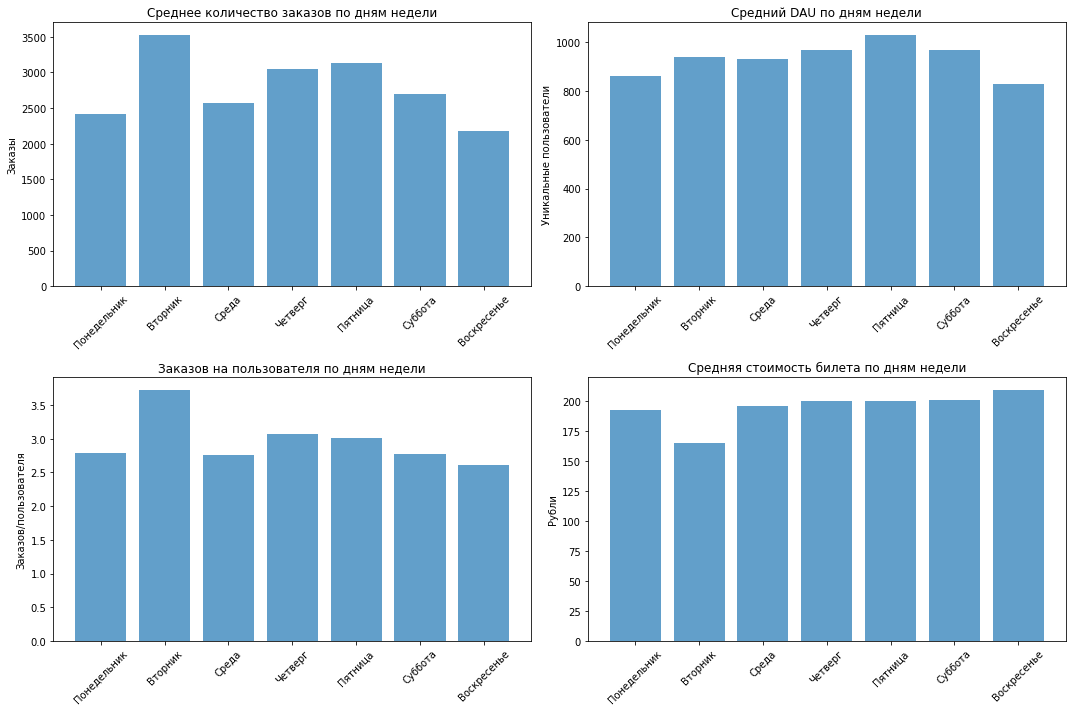

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].bar(week_analysis['day_of_week'], week_analysis['total_orders'], alpha=0.7)
axes[0, 0].set_title('Среднее количество заказов по дням недели')
axes[0, 0].set_ylabel('Заказы')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticklabels(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

axes[0, 1].bar(week_analysis['day_of_week'], week_analysis['dau'], alpha=0.7)
axes[0, 1].set_title('Средний DAU по дням недели')
axes[0, 1].set_ylabel('Уникальные пользователи')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xticklabels(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

axes[1, 0].bar(week_analysis['day_of_week'], week_analysis['orders_per_user'], alpha=0.7)
axes[1, 0].set_title('Заказов на пользователя по дням недели')
axes[1, 0].set_ylabel('Заказов/пользователя')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xticklabels(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

axes[1, 1].bar(week_analysis['day_of_week'], week_analysis['avg_ticket_price'], alpha=0.7)
axes[1, 1].set_title('Средняя стоимость билета по дням недели')
axes[1, 1].set_ylabel('Рубли')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xticklabels(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

plt.tight_layout()
plt.show()


In [63]:
max_orders_day = daily_activity.loc[daily_activity['total_orders'].idxmax()]
min_orders_day = daily_activity.loc[daily_activity['total_orders'].idxmin()]

print(f"Пик заказов: {max_orders_day['date'].strftime('%Y-%m-%d')} - {max_orders_day['total_orders']} заказов")
print(f"Минимум заказов: {min_orders_day['date'].strftime('%Y-%m-%d')} - {min_orders_day['total_orders']} заказов")

Пик заказов: 2024-10-01 - 7310 заказов
Минимум заказов: 2024-09-01 - 1348 заказов


In [64]:
week_avg = weekend_comparison[weekend_comparison['day_type'] == 'Будни'].iloc[0]
weekend_avg = weekend_comparison[weekend_comparison['day_type'] == 'Выходные'].iloc[0]

print(f"\nРазница будни vs выходные:")
print(f"Заказов: {week_avg['total_orders']:.1f} vs {weekend_avg['total_orders']:.1f} ({((weekend_avg['total_orders'] - week_avg['total_orders']) / week_avg['total_orders'] * 100):+.1f}%)")
print(f"DAU: {week_avg['dau']:.1f} vs {weekend_avg['dau']:.1f} ({((weekend_avg['dau'] - week_avg['dau']) / week_avg['dau'] * 100):+.1f}%)")
print(f"Стоимость билета: {week_avg['avg_ticket_price']:.1f} vs {weekend_avg['avg_ticket_price']:.1f} руб. ({((weekend_avg['avg_ticket_price'] - week_avg['avg_ticket_price']) / week_avg['avg_ticket_price'] * 100):+.1f}%)")



Разница будни vs выходные:
Заказов: 2933.1 vs 2419.1 (-17.5%)
DAU: 943.7 vs 893.2 (-5.4%)
Стоимость билета: 190.2 vs 205.1 руб. (+7.9%)


1. Дни недели: Самое высокое среднее количество всех заказов зафиксировано во вторник, а самое низкое в воскресенье. Самый высокий DAU наблюдается в пятницу, самый низкий - в воскресенье. Самое высокое среднее количество заказов на пользователя отмечается во вторник, самое низкое - в воскресенье. Самая высокая средняя цена билета зафиксирована в воскресенье, а самая низкая - во вторник.
3. Сравнение будних и выходных дней: Заказов в выходные меньше на 17,5%, DAU в выходные ниже на 5.2%. Средняя стоимость билета в выходные на 7.9% выше, чем в будние дни.

#### 3.3 Популярные события и партнеры

**Распределение по регионам**

In [65]:
regional_analysis = df_all.groupby('region_name').agg({
    'event_id': 'nunique',
    'order_id': 'count',
    'revenue_rub': 'sum'
}).reset_index()

regional_analysis.columns = ['region', 'unique_events', 'total_orders', 'total_revenue']
regional_analysis

,region,unique_events,total_orders,total_revenue
0,белоярская область,57,199,8.453687e+04
1,берестовский округ,39,395,2.894823e+05
2,берёзовская область,166,1282,2.046422e+05
3,боровлянский край,97,1721,1.351022e+06
4,верховинская область,8,50,7.852511e+04
...,...,...,...,...
76,шанырский регион,28,2882,2.547064e+06
77,широковская область,1233,16457,9.509246e+06
78,яблоневская область,535,6179,3.683349e+06
79,ягодиновская область,120,1044,4.979369e+05


In [66]:
total_events = regional_analysis['unique_events'].sum()
total_orders_all = regional_analysis['total_orders'].sum()
total_revenue_all = regional_analysis['total_revenue'].sum()

regional_analysis['events_share'] = (regional_analysis['unique_events'] / total_events * 100).round(1)
regional_analysis['orders_share'] = (regional_analysis['total_orders'] / total_orders_all * 100).round(1)
regional_analysis['revenue_share'] = (regional_analysis['total_revenue'] / total_revenue_all * 100).round(1)

regional_analysis_sorted = regional_analysis.sort_values('unique_events', ascending=False)

print("Топ-10 регионов по разнообразию мероприятий:")
print(regional_analysis_sorted[['region', 'unique_events', 'events_share', 'total_orders', 'orders_share']].head(10))

Топ-10 регионов по разнообразию мероприятий:
                  region  unique_events  events_share  total_orders  \
23    каменевский регион           5983          26.7         91049   
60  североярская область           3814          17.0         44043   
77   широковская область           1233           5.5         16457   
57  светополянский округ           1075           4.8          7606   
52   речиновская область            702           3.1          6293   
74      травяная область            683           3.0          5045   
11  горицветская область            551           2.5          5166   
61  серебринская область            542           2.4          5610   
78   яблоневская область            535           2.4          6179   
69  тепляковская область            530           2.4          4388   

    orders_share  
23          31.3  
60          15.2  
77           5.7  
57           2.6  
52           2.2  
74           1.7  
11           1.8  
61           1.9  
78

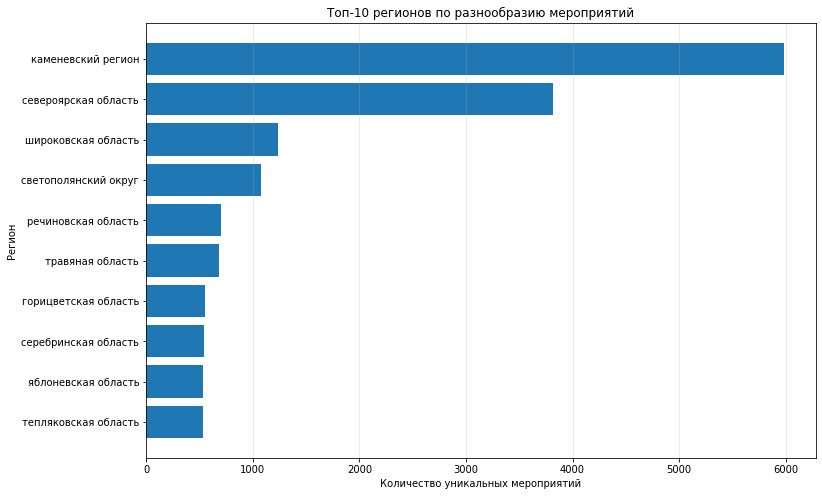

In [67]:
plt.figure(figsize=(12, 8))
top_regions = regional_analysis_sorted.head(10)
plt.barh(top_regions['region'], top_regions['unique_events'])
plt.xlabel('Количество уникальных мероприятий')
plt.ylabel('Регион')
plt.title('Топ-10 регионов по разнообразию мероприятий')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.show()

**Билетные партнеров**

In [68]:
partners_analysis = df_all.groupby('service_name').agg({
    'event_id': 'nunique',
    'order_id': 'count',
    'revenue_rub': 'sum',
    'one_ticket_revenue_rub': 'mean'
}).reset_index()

partners_analysis.columns = ['partner', 'unique_events', 'total_orders', 'total_revenue', 'avg_ticket_price']
partners_analysis

,partner,unique_events,total_orders,total_revenue,avg_ticket_price
0,crazy ticket!,257,790,4.547353e+05,211.082001
1,show_ticket,295,2200,1.889535e+06,298.461877
2,билет по телефону,20,85,7.244740e+04,285.845414
3,билеты без проблем,4263,63696,2.670165e+07,152.861507
4,билеты в интернете,1,4,5.482300e+02,34.264167
5,билеты в руки,3544,40359,1.338741e+07,118.608277
6,быстробилет,255,2002,1.591665e+06,308.764238
7,быстрый кассир,20,381,4.019754e+05,355.761441
8,весь в билетах,867,16849,1.804930e+07,374.587555
9,восьмёрка,144,1118,6.964916e+05,212.432067


In [69]:
partners_analysis['events_share'] = (partners_analysis['unique_events'] / partners_analysis['unique_events'].sum() * 100).round(1)
partners_analysis['orders_share'] = (partners_analysis['total_orders'] / partners_analysis['total_orders'].sum() * 100).round(1)
partners_analysis['revenue_share'] = (partners_analysis['total_revenue'] / partners_analysis['total_revenue'].sum() * 100).round(1)

partners_analysis_sorted = partners_analysis.sort_values('total_revenue', ascending=False)

print("Топ-10 партнеров по выручке:")
print(partners_analysis_sorted[['partner', 'total_revenue', 'revenue_share', 'unique_events', 'total_orders']].head(10))

Топ-10 партнеров по выручке:
               partner  total_revenue  revenue_share  unique_events  \
3   билеты без проблем   2.670165e+07           16.5           4263   
24           мой билет   2.347710e+07           14.5           1310   
25             облачко   2.164407e+07           13.4           2348   
8       весь в билетах   1.804930e+07           11.2            867   
21         лови билет!   1.766525e+07           10.9           4884   
5        билеты в руки   1.338741e+07            8.3           3544   
19        край билетов   6.703959e+06            4.2            253   
26           прачечная   4.900985e+06            3.0           1027   
13        дом культуры   4.676648e+06            2.9            274   
35              яблоко   3.971152e+06            2.5            716   

    total_orders  
3          63696  
24         34840  
25         26642  
8          16849  
21         41122  
5          40359  
19          6207  
26         10273  
13          4502  

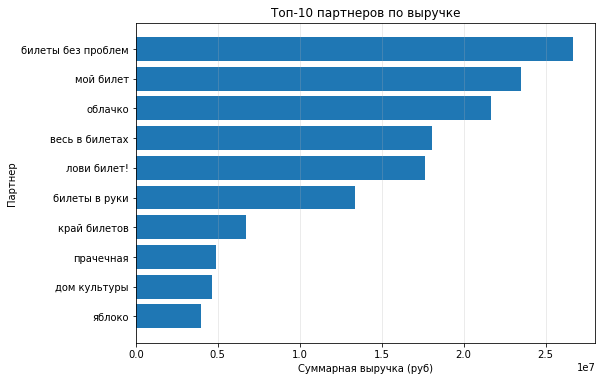

In [70]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
top_partners_revenue = partners_analysis_sorted.head(10)
plt.barh(top_partners_revenue['partner'], top_partners_revenue['total_revenue'])
plt.xlabel('Суммарная выручка (руб)')
plt.ylabel('Партнер')
plt.title('Топ-10 партнеров по выручке')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

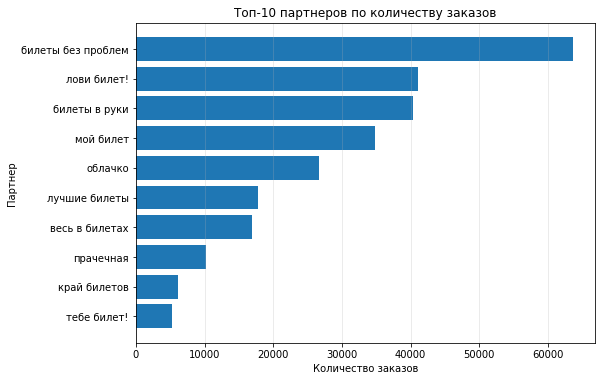

In [71]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
partners_analysis_orders = partners_analysis.sort_values('total_orders', ascending=False).head(10)
plt.barh(partners_analysis_orders['partner'], partners_analysis_orders['total_orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Партнер')
plt.title('Топ-10 партнеров по количеству заказов')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

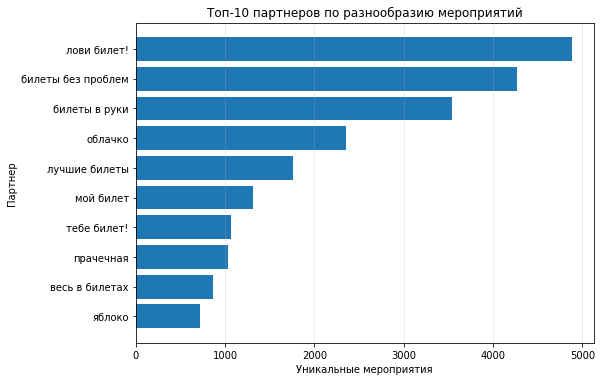

In [72]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
partners_analysis_events = partners_analysis.sort_values('unique_events', ascending=False).head(10)
plt.barh(partners_analysis_events['partner'], partners_analysis_events['unique_events'])
plt.xlabel('Уникальные мероприятия')
plt.ylabel('Партнер')
plt.title('Топ-10 партнеров по разнообразию мероприятий')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

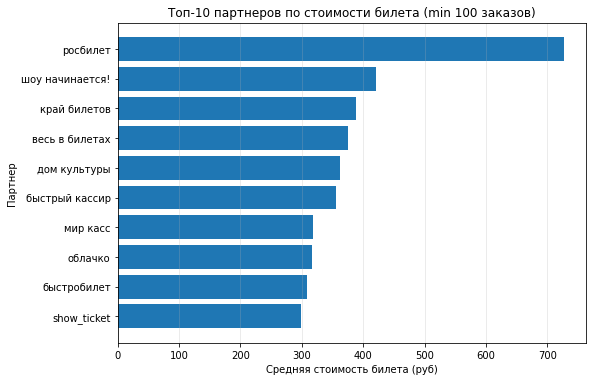

In [73]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
partners_analysis_price = partners_analysis[partners_analysis['total_orders'] > 100].sort_values('avg_ticket_price', ascending=False).head(10)
plt.barh(partners_analysis_price['partner'], partners_analysis_price['avg_ticket_price'])
plt.xlabel('Средняя стоимость билета (руб)')
plt.ylabel('Партнер')
plt.title('Топ-10 партнеров по стоимости билета (min 100 заказов)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


1. Регионы: наиболее популярные регионы по количеству мероприятий: каменевский регион, североярская область, широковская область. Количество уникальный мероприятий для них 5983, 3814, 1233 соотвественно. Общее количество заказов 91058, 44049, 16457 соотвественно. Остальные регионы имеют примерно одинаковое распределение.
2. Билетные партнеры: наиболее популярные партнеры по выручке: билеты без проблем, мой билет, облачко. По количеству заказов лидерами являются билеты без проблем, лови билет!, билеты в руки. По разнообразию мероприятий лидерами являются: лови билет!, билеты без проблем, билеты в руки. По стоимости билетов лидерами являются росбилет, шоу начинается! и край билетов.

### Шаг 4. Статистический анализ данных

#### 4.1 Среднее количество заказов

In [74]:
autumn_data = df_all[df_all['season'] == 'осень'].copy()
device_data = autumn_data[autumn_data['device_type_canonical'].isin(['mobile', 'desktop'])].copy()
print(f"Данные за осень: {len(device_data)} заказов")
print("Распределение по устройствам:")
print(device_data['device_type_canonical'].value_counts())

Данные за осень: 170182 заказов
Распределение по устройствам:
mobile     135496
desktop     34686
Name: device_type_canonical, dtype: int64


In [75]:
orders_per_user = device_data.groupby(['user_id', 'device_type_canonical']).size().reset_index()
orders_per_user.columns = ['user_id', 'device_type', 'order_count']
mobile_orders = orders_per_user[orders_per_user['device_type'] == 'mobile']['order_count']
desktop_orders = orders_per_user[orders_per_user['device_type'] == 'desktop']['order_count']

print("Описательная статистика:")
print("Мобильные устройства:")
print(mobile_orders.describe())
print("\nСтационарные устройства:")
print(desktop_orders.describe())

Описательная статистика:
Мобильные устройства:
count    14241.000000
mean         9.514500
std         68.502267
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4370.000000
Name: order_count, dtype: float64

Стационарные устройства:
count    4907.000000
mean        7.068677
std        36.174369
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1510.000000
Name: order_count, dtype: float64


Т.к. среднее и медианна в обеих группах различаются почти в 4 раза, можно сделать вывод что распределение не является нормальным.

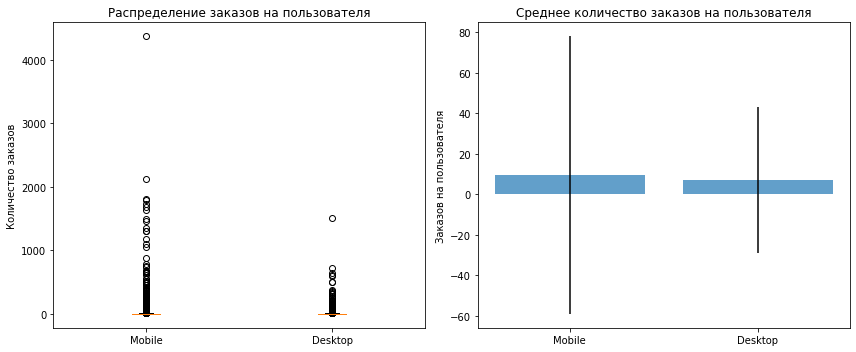

In [76]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot([mobile_orders, desktop_orders], labels=['Mobile', 'Desktop'])
plt.title('Распределение заказов на пользователя')
plt.ylabel('Количество заказов')

plt.subplot(1, 2, 2)
plt.bar(['Mobile', 'Desktop'], [mobile_orders.mean(), desktop_orders.mean()],
        yerr=[mobile_orders.std(), desktop_orders.std()], alpha=0.7)
plt.title('Среднее количество заказов на пользователя')
plt.ylabel('Заказов на пользователя')

plt.tight_layout()
plt.show()

**Гипотезы:**
    
H0: количество заказаов совершенных мобильными пользователями ссовпадает с количеством заказов совершенных пользователями стационарных устройств

H1: количество заказаов совершенных мобильными пользователями больше количества заказов совершенных пользователями стационарных устройств

In [77]:
user_devices = df_orders_clean.groupby('user_id')['device_type_canonical'].nunique()

overlapping_users = user_devices[user_devices > 1].index.tolist()

print(f"Всего уникальных пользователей: {df_orders_clean['user_id'].nunique()}")
print(f"Пользователей только с mobile: {len(df_orders_clean[df_orders_clean['device_type_canonical'] == 'mobile']['user_id'].unique())}")
print(f"Пользователей только с desktop: {len(df_orders_clean[df_orders_clean['device_type_canonical'] == 'desktop']['user_id'].unique())}")
print(f"Пересекающихся пользователей (заказывали с обоих устройств): {len(overlapping_users)}")

if len(overlapping_users) > 0:
    print("Надо удалить пересекающихся пользвателей")
    df_clean_analysis = df_orders_clean[~df_orders_clean['user_id'].isin(overlapping_users)]
else:
    df_clean_analysis = df_orders_clean.copy()
    print("Пересекающихся пользователей не обнаружено")

Всего уникальных пользователей: 21940
Пользователей только с mobile: 19788
Пользователей только с desktop: 7139
Пересекающихся пользователей (заказывали с обоих устройств): 4987
Надо удалить пересекающихся пользвателей


In [78]:
user_orders = df_clean_analysis.groupby(['user_id', 'device_type_canonical']).agg(
    order_count=('order_id', 'count'),
    total_tickets=('tickets_count', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

print(f"После очистки:")
print(f"Уникальных пользователей: {user_orders['user_id'].nunique()}")
print(f"Mobile пользователей: {len(user_orders[user_orders['device_type_canonical'] == 'mobile'])}")
print(f"Desktop пользователей: {len(user_orders[user_orders['device_type_canonical'] == 'desktop'])}")

После очистки:
Уникальных пользователей: 16953
Mobile пользователей: 14801
Desktop пользователей: 2152


In [79]:
mobile_orders = user_orders[user_orders['device_type_canonical'] == 'mobile']['order_count']
desktop_orders = user_orders[user_orders['device_type_canonical'] == 'desktop']['order_count']

shapiro_mobile = stats.shapiro(mobile_orders)
shapiro_desktop = stats.shapiro(desktop_orders)

print(f"Тест Шапиро-Уилка на нормальность:")
print(f"Мобильные: p-value = {shapiro_mobile.pvalue:.4f}")
print(f"Десктоп: p-value = {shapiro_desktop.pvalue:.4f}")

Тест Шапиро-Уилка на нормальность:
Мобильные: p-value = 0.0000
Десктоп: p-value = 0.0000


Т.к. распределение не нормальное,  используем тест Манна-Уитни

In [80]:
mannwhitney_test = stats.mannwhitneyu(mobile_orders,
                                     desktop_orders,
                                     alternative='greater')

print(f"U-тест Манна-Уитни:")
print(f"Статистика: {mannwhitney_test.statistic}")
print(f"p-value: {mannwhitney_test.pvalue:.4f}")

U-тест Манна-Уитни:
Статистика: 19028619.0
p-value: 0.0000


print(f"\nГипотеза 1 - точное p-value: {mannwhitney_test.pvalue}")
print(f"В экспоненциальной записи: {mannwhitney_test.pvalue:.2e}")

In [81]:
alpha = 0.05
if mannwhitney_test.pvalue < alpha:
    print(f"\nРезультат: p-value < {alpha}: отклоняем нулевую гипотезу")
    print("Пользователи мобильных устройств совершают БОЛЬШЕ заказов")
    diff_percent = ((mobile_orders.mean() - desktop_orders.mean()) / desktop_orders.mean() * 100)
    print(f"Разница: {diff_percent:.1f}%")
else:
    print(f"\nРезультат: p-value ≥ {alpha}: не отклоняем нулевую гипотезу")
    print("Нет статистически значимых различий в количестве заказов")


Результат: p-value < 0.05: отклоняем нулевую гипотезу
Пользователи мобильных устройств совершают БОЛЬШЕ заказов
Разница: 51.0%


#### 4.2 Среднее время между заказами

In [82]:
device_data_sorted = device_data.sort_values(['user_id', 'created_ts_msk'])

In [83]:
time_between_orders = []
current_user = None
prev_time = None

for _, row in device_data_sorted.iterrows():
    if row['user_id'] != current_user:
        current_user = row['user_id']
        prev_time = row['created_ts_msk']
        continue

    time_diff = (row['created_ts_msk'] - prev_time).total_seconds() / 3600  # в часах
    time_between_orders.append({
        'user_id': row['user_id'],
        'device_type': row['device_type_canonical'],
        'time_diff_hours': time_diff
    })
    prev_time = row['created_ts_msk']

time_diff_df = pd.DataFrame(time_between_orders)

In [84]:
mobile_time = time_diff_df[time_diff_df['device_type'] == 'mobile']['time_diff_hours']
desktop_time = time_diff_df[time_diff_df['device_type'] == 'desktop']['time_diff_hours']

print("Описательная статистика времени между заказами:")
print("Мобильные устройства:")
print(mobile_time.describe())
print("\nСтационарные устройства:")
print(desktop_time.describe())

Описательная статистика времени между заказами:
Мобильные устройства:
count    122264.000000
mean         36.860750
std         116.351874
min           0.000000
25%           0.048889
50%           0.618611
75%          12.802083
max        1417.633889
Name: time_diff_hours, dtype: float64

Стационарные устройства:
count    32044.000000
mean        29.637889
std        106.500966
min          0.000000
25%          0.025556
50%          0.221111
75%          5.172569
max       1408.546944
Name: time_diff_hours, dtype: float64


Среднее и медиана сильно отличаются в обеих группах (в 78 раз в первой группе, и в 148 раз во второй), распределение не является нормальным.

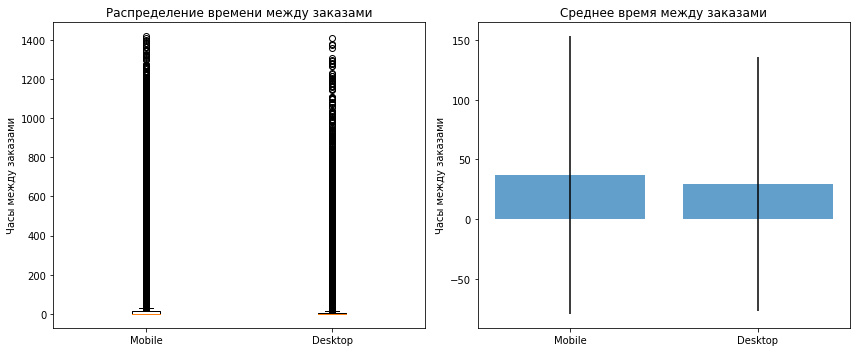

In [85]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot([mobile_time, desktop_time], labels=['Mobile', 'Desktop'])
plt.title('Распределение времени между заказами')
plt.ylabel('Часы между заказами')

plt.subplot(1, 2, 2)
plt.bar(['Mobile', 'Desktop'], [mobile_time.mean(), desktop_time.mean()],
        yerr=[mobile_time.std(), desktop_time.std()], alpha=0.7
        )
plt.title('Среднее время между заказами')
plt.ylabel('Часы между заказами')

plt.tight_layout()
plt.show()

**Гипотезы**:

Н0: Среднее время между заказами пользователями мобильных и стационарных устройств равно.

H1: Среднее время между заказами у пользователей мобильныйх устройств больше чем у пользователей стационарных устройств.

In [86]:
shapiro_mobile_time = stats.shapiro(mobile_time)
shapiro_desktop_time = stats.shapiro(desktop_time)

print(f"\nТест Шапиро-Уилка на нормальность:")
print(f"Мобильные: p-value = {shapiro_mobile_time.pvalue:.4f}")
print(f"Десктоп: p-value = {shapiro_desktop_time.pvalue:.4f}")


Тест Шапиро-Уилка на нормальность:
Мобильные: p-value = 0.0000
Десктоп: p-value = 0.0000


Распределение не нормальное, поэтому используем тест Манна-Уитни.

In [87]:
mannwhitney_time = stats.mannwhitneyu(mobile_time, desktop_time, alternative='greater')

print(f"\nU-тест Манна-Уитни для времени между заказами:")
print(f"Статистика: {mannwhitney_time.statistic}")
print(f"p-value: {mannwhitney_time.pvalue:.4f}")


U-тест Манна-Уитни для времени между заказами:
Статистика: 2231993184.0
p-value: 0.0000


In [88]:
print(f"\nГипотеза 2 - точное p-value: {mannwhitney_time.pvalue}")
print(f"В экспоненциальной записи: {mannwhitney_time.pvalue:.2e}")


Гипотеза 2 - точное p-value: 0.0
В экспоненциальной записи: 0.00e+00


In [89]:
if mannwhitney_time.pvalue < 0.05:
    print("Гипотеза Н0 не находит подтверждения, принимаем Н1: Время между заказами больше у мобильных пользователей")
    print(f"Среднее: Mobile = {mobile_time.mean():.1f} часов, Desktop = {desktop_time.mean():.1f} часов")
    print(f"Разница: {((mobile_time.mean() - desktop_time.mean())/desktop_time.mean()*100):.1f}%")
else:
    print("Гипотеза Н0 верна: Значимых различий во времени между заказами нет")
    print("p-value > 0.05, различия статистически не значимы")

Гипотеза Н0 не находит подтверждения, принимаем Н1: Время между заказами больше у мобильных пользователей
Среднее: Mobile = 36.9 часов, Desktop = 29.6 часов
Разница: 24.4%


1. Тестом Манна-Уитни подтвердили гипотезу о том, что пользователи мобильных устройств совершают больше заказов (на 51%). **p-value=1.26e-55**
2. Тестом Манна-Уитни подтвердили гипотезу о том, что среднее время между заказами выше у пользователей мобильных устройств (на 24.4%). **p-value=0.00e+00**

### Шаг 5. Общий вывод и рекомендации

#### Выводы
1. Была произведена работа с данными по заказам, событиям и курсу валют. Все три датасета были проверены на пропуски, отчищены от явных и неявных дубликатов, проверены на корректность типов данных.
2. Наиболее востребованные мероприятия: концерты, театр и другое. Летом популярность концертов, другое,стендапов и выставок выше, чем осенью. При этом популярность театра, спорта и елок выше осенью. Средняя стоимость билета летом была выше у спорта, другое, концертов, еолок и театров, при этом средняя стоимость билета на стендап и выставки была выше осенью, чем летом.
3. Наибольшее среднее количество заказов в день и количество заказов на пользователя наблюдалось по вторникам, самые низкие данные показатели зафиксированы в воскресенье. Наибольший DAU был в пятницу, наименьший в воскресенье. При этом самая высокая средняя стоиомсть билета наблюдалась в воскресенье, а самая низкая - во вторник.
4. Лидеры по количеству мероприятий: Каменевский регион, Североярская область, Широковская область. Лидеры среди билетных операторов по количеству заказов: Билеты без проблем, Лови билет!, Билеты в руки, а по выручке с продажи билетов: Билеты без проблем, Мой билет, Облачко.
5. С помощью теста Манна-Уитни подтвердили гипотезу о том что пользователи мобильных устройств делают в среднем больше заказов чем пользлватели стационарых устройств.
6. С помощью теста Манна-Уитни подтвердили гипотезу о том что среднее время между заказами у мобильных пользователей больше чем у пользлвателей стационарных устройств.

#### Рекомендации
1. Провести рекламные акции позволяющие поднять количество заказов в осенний период.
2. Сфокусироватся на топ 3 регионов, также проработать партнерство с лидирующими билетными операторами.
3. Подробнее расмотреть мобильное приложение, возможно более простой интерйфес, продвинутая система рекомендаций и упрощенние схемы оплаты заказов, позволят снизить количество времени между заказами.1996
